In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [64]:
noisy_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-lowsnr.tif'
gt_path=r'C:\Users\bioimaging1\Desktop\Deep learning image\actin\actin-60x-noise1-highsnr.tif'

def images(num):
    with Image.open(gt_path) as gt, Image.open(noisy_path) as noisy:
        x=np.zeros((num,*gt.size), dtype="float32");y=np.zeros_like(x)
        for t in range(num):
            gt.seek(t);noisy.seek(t)
            x[t]=np.array(gt,dtype="float32")
            y[t]=np.array(noisy,dtype="float32")
    return x, y
    
def normalization(image, percent_left, percent_right):
    img=np.zeros_like(image)
    for i in range(len(img)):
        histogram=np.sort(image[i].flatten())
        n=histogram[int(percent_left*len(histogram))]
        m=histogram[-1-int(percent_right*len(histogram))]
        img[i]=(np.clip(image[i],n,m)-n)/(m-n)
    return img

In [65]:
x,y=images(20) # 先用少数图片得到大概范围
noise_mean=np.zeros((6,6))
for i in range(6):
    for j in range(6):
        high=normalization(x,0.1**(i+1),0.1**(j+1))
        low=normalization(y,0.1**(i+1),0.1**(j+1))
        noise= high-low
        noise_mean[i,j]=abs(noise.mean())
        print(f"left:{i+1} right:{j+1}, {noise_mean[i,j]}")

left:1 right:1, 0.052960801869630814
left:1 right:2, 0.01657159999012947
left:1 right:3, 0.00754522904753685
left:1 right:4, 0.004211024846881628
left:1 right:5, 0.002018256112933159
left:1 right:6, 0.0009450833313167095
left:2 right:1, 0.12367594242095947
left:2 right:2, 0.05671123415231705
left:2 right:3, 0.03479032590985298
left:2 right:4, 0.02482934482395649
left:2 right:5, 0.01928005740046501
left:2 right:6, 0.014326691627502441
left:3 right:1, 0.1983094960451126
left:3 right:2, 0.10595633089542389
left:3 right:3, 0.06972680240869522
left:3 right:4, 0.05187172815203667
left:3 right:5, 0.042193688452243805
left:3 right:6, 0.03476347029209137
left:4 right:1, 0.23236307501792908
left:4 right:2, 0.13301876187324524
left:4 right:3, 0.09014035761356354
left:4 right:4, 0.06816200911998749
left:4 right:5, 0.0562058687210083
left:4 right:6, 0.047362055629491806
left:5 right:1, 0.30913180112838745
left:5 right:2, 0.20302113890647888
left:5 right:3, 0.1454278975725174
left:5 right:4, 0.11321

left:1e-1 right:1e-6 0.0009450833313167095


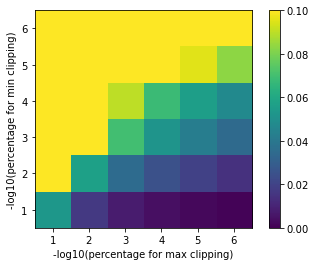

In [73]:
i,j=np.unravel_index(noise_mean.argmin(),noise_mean.shape)
print(f"left:1e-{i+1}",f"right:1e-{j+1}",noise_mean.min())
noise_mean=np.concatenate([np.zeros_like(noise_mean[np.newaxis,0]),noise_mean])
noise_mean=np.concatenate([np.zeros_like(noise_mean[...,0,np.newaxis]),noise_mean], axis=-1)
plt.imshow(noise_mean, vmax=0.08)
plt.xlabel("-log10(percentage for max clipping)")
plt.ylabel("-log10(percentage for min clipping)")
plt.xlim(.5,6.5)
plt.ylim(.5,6.5)
plt.colorbar()

In [77]:
# 小范围精准找
noise_mean=np.zeros((5,5))
left=np.linspace(1e-2,0.2,5)
right=np.linspace(1e-6,1e-4,5)
for i in range(5):
    for j in range(5):
        high=normalization(x,left[i],right[j])
        low=normalization(y,left[i],right[j])
        noise= high-low
        noise_mean[i,j]=abs(noise.mean())
        print(f"left:{left[i]:.4f} right:{right[j]:.4f}, {noise_mean[i,j]}")

left:0.01 right:1e-06, 0.014326691627502441
left:0.01 right:2.5750000000000002e-05, 0.02114081382751465
left:0.01 right:5.05e-05, 0.023102831095457077
left:0.01 right:7.525e-05, 0.024316122755408287
left:0.01 right:0.0001, 0.02482934482395649
left:0.0575 right:1e-06, 0.002430687192827463
left:0.0575 right:2.5750000000000002e-05, 0.006818647030740976
left:0.0575 right:5.05e-05, 0.007981250062584877
left:0.0575 right:7.525e-05, 0.008634581230580807
left:0.0575 right:0.0001, 0.008776337839663029
left:0.105 right:1e-06, 0.0015371787594631314
left:0.105 right:2.5750000000000002e-05, 0.002022341126576066
left:0.105 right:5.05e-05, 0.0029093907214701176
left:0.105 right:7.525e-05, 0.0033711728174239397
left:0.105 right:0.0001, 0.0033881347626447678
left:0.15250000000000002 right:1e-06, 0.00398571090772748
left:0.15250000000000002 right:2.5750000000000002e-05, 0.0009565546060912311
left:0.15250000000000002 right:5.05e-05, 0.0002456025395076722
left:0.15250000000000002 right:7.525e-05, 8.666909

In [93]:
i,j=np.unravel_index(noise_mean.argmin(),noise_mean.shape)
old_noise_mean=noise_mean.min()
print(f"left:{left[i]} right:{right[j]}, {old_noise_mean}")

left:0.15250000000000002 right:0.0001, 2.1157742594368756e-05


(-0.5, 4.5, 4.5, -0.5)

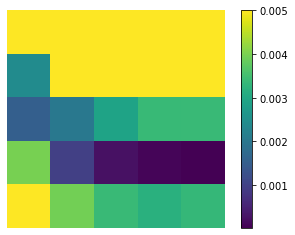

In [84]:
plt.imshow(noise_mean, vmax=0.005)
plt.colorbar()
plt.axis("off")

In [ ]:
# 在全部图片上进行验证，并查看图片
x,y=images(100)
x=normalization(x,0.1525,1e-4)
y=normalization(y,0.1525,1e-4)
noise=x-y
noise_mean=noise.mean()
print(noise_mean)
print(noise_mean*255)
# print(abs(noise_mean/old_noise_mean))

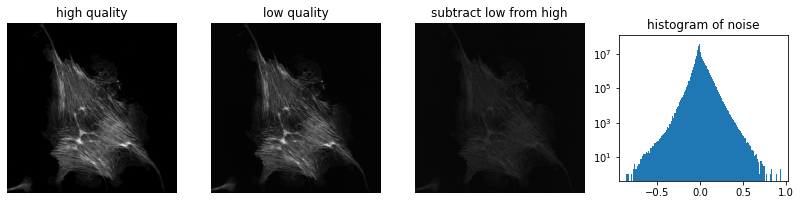

In [160]:
plt.figure(figsize=(14,7))
plt.subplot(141)
plt.imshow(x[0],cmap="gray");plt.title("high quality");plt.axis("off")
plt.subplot(142)
plt.imshow(y[0],cmap="gray");plt.title("low quality");plt.axis("off")
plt.subplot(143)
plt.imshow(np.abs(x[0]-y[0]),cmap="gray");plt.title("subtract low from high");plt.axis("off")
ax=plt.subplot(144);ax.set_aspect(1/5)
plt.hist(noise.flatten(),bins=400);plt.title("histogram of noise");plt.yscale("log")

In [ ]:
# only clip the maximum pixels, as comparison
a,b=images(100)
a=normalization(a,0,1e-4)
b=normalization(b,0,1e-4)
noise1=a-b
noise_mean=noise1.mean()
print(noise_mean)
print(noise_mean*255)

-0.19276223
-49.154367595911026


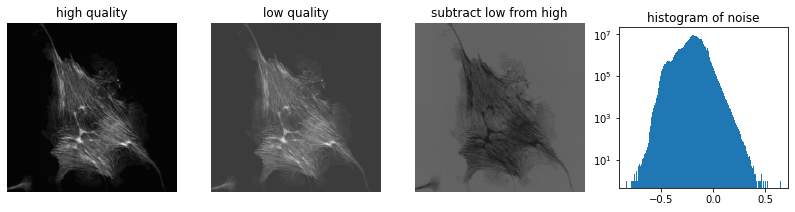

In [163]:
plt.figure(figsize=(14,7))
plt.subplot(141)
plt.imshow(a[0],cmap="gray");plt.title("high quality");plt.axis("off")
plt.subplot(142)
plt.imshow(b[0],cmap="gray");plt.title("low quality");plt.axis("off")
plt.subplot(143)
plt.imshow(np.abs(a[0]-b[0]),cmap="gray");plt.title("subtract low from high");plt.axis("off")
ax=plt.subplot(144);ax.set_aspect(1/5)
plt.hist(noise1.flatten(),bins=400);plt.title("histogram of noise");plt.yscale("log")